In [1]:
import pandas as pd

In [2]:
file_path = r"E:\Guvi\Projects\Car Dheko\bangalore_cars.xlsx"
df = pd.read_excel(file_path)

In [3]:
df.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [4]:
df['new_car_detail']

0       {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
1       {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...
2       {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
3       {'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...
4       {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...
                              ...                        
1476    {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...
1477    {'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...
1478    {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
1479    {'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...
1480    {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
Name: new_car_detail, Length: 1481, dtype: object

In [5]:
import ast

# Fix columns with stringified dictionaries/lists
cols_to_fix = ['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs']

for col in cols_to_fix:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [6]:
detail_df = pd.json_normalize(df['new_car_detail'])

def normalize_top_column(col_data, prefix):
    normalized = col_data.apply(
        lambda x: {item['key']: item['value'] for item in x['top'] if 'key' in item and 'value' in item}
    )
    return pd.DataFrame(normalized.tolist()).add_prefix(f'{prefix}_')

overview_df = normalize_top_column(df['new_car_overview'], 'overview')
specs_df = normalize_top_column(df['new_car_specs'], 'specs')

feature_df = df['new_car_feature'].apply(
    lambda x: ', '.join([item['value'] for item in x['top'] if 'value' in item])
).to_frame(name='features')

In [7]:
final_df = pd.concat([
    detail_df,
    overview_df,
    specs_df,
    feature_df,
    df[['car_links']]
], axis=1)

In [8]:
final_df.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,overview_Transmission,overview_Year of Manufacture,specs_Mileage,specs_Engine,specs_Max Power,specs_Torque,specs_Seats,specs_Wheel Size,features,car_links
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,Manual,2015.0,23.1 kmpl,998 CC,67.04bhp,90Nm,5,NaN,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/used-car-details/used...
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,Manual,2018.0,17 kmpl,1497 CC,121.31bhp,150Nm,5,16,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/buy-used-car-details/...
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,Manual,2018.0,23.84 kmpl,1199 CC,84bhp,114Nm,5,14,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/used-car-details/used...
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,Manual,2014.0,19.1 kmpl,1197 CC,81.86bhp,113.75Nm,5,14,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/buy-used-car-details/...
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,Manual,2015.0,23.65 kmpl,1248 CC,88.5bhp,200Nm,5,16,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/used-car-details/used...


In [9]:
# bangalore_cars

In [10]:
import pandas as pd
import ast

df = pd.read_excel(r"E:\Guvi\Projects\Car Dheko\bangalore_cars.xlsx")

for col in ['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs']:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

detail_df = pd.json_normalize(df['new_car_detail'])

def normalize_top_column(col_data, prefix):
    normalized = col_data.apply(
        lambda x: {item['key']: item['value'] for item in x['top'] if 'key' in item and 'value' in item}
    )
    return pd.DataFrame(normalized.tolist()).add_prefix(f'{prefix}_')

overview_df = normalize_top_column(df['new_car_overview'], 'overview')
specs_df = normalize_top_column(df['new_car_specs'], 'specs')
feature_df = df['new_car_feature'].apply(lambda x: ', '.join([f['value'] for f in x['top'] if 'value' in f])).to_frame(name='features')

final_df = pd.concat([detail_df, overview_df, specs_df, feature_df, df[['car_links']]], axis=1)
final_df.to_csv(r"E:\Guvi\Projects\Car Dheko\bangalore_cars_data.csv", index=False)

In [11]:
# chennai_cars

In [12]:
df = pd.read_excel(r"E:\Guvi\Projects\Car Dheko\chennai_cars.xlsx")

for col in ['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs']:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

detail_df = pd.json_normalize(df['new_car_detail'])
overview_df = normalize_top_column(df['new_car_overview'], 'overview')
specs_df = normalize_top_column(df['new_car_specs'], 'specs')
feature_df = df['new_car_feature'].apply(lambda x: ', '.join([f['value'] for f in x['top'] if 'value' in f])).to_frame(name='features')

final_df = pd.concat([detail_df, overview_df, specs_df, feature_df, df[['car_links']]], axis=1)
final_df.to_csv(r"E:\Guvi\Projects\Car Dheko\chennai_cars_data.csv", index=False)

In [13]:
# delhi_cars

In [14]:
df = pd.read_excel(r"E:\Guvi\Projects\Car Dheko\delhi_cars.xlsx")

for col in ['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs']:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

detail_df = pd.json_normalize(df['new_car_detail'])
overview_df = normalize_top_column(df['new_car_overview'], 'overview')
specs_df = normalize_top_column(df['new_car_specs'], 'specs')
feature_df = df['new_car_feature'].apply(lambda x: ', '.join([f['value'] for f in x['top'] if 'value' in f])).to_frame(name='features')

final_df = pd.concat([detail_df, overview_df, specs_df, feature_df, df[['car_links']]], axis=1)
final_df.to_csv(r"E:\Guvi\Projects\Car Dheko\delhi_cars_data.csv", index=False)

In [15]:
# hyderabad_cars

In [16]:
df = pd.read_excel(r"E:\Guvi\Projects\Car Dheko\hyderabad_cars.xlsx")

for col in ['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs']:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

detail_df = pd.json_normalize(df['new_car_detail'])
overview_df = normalize_top_column(df['new_car_overview'], 'overview')
specs_df = normalize_top_column(df['new_car_specs'], 'specs')
feature_df = df['new_car_feature'].apply(lambda x: ', '.join([f['value'] for f in x['top'] if 'value' in f])).to_frame(name='features')

final_df = pd.concat([detail_df, overview_df, specs_df, feature_df, df[['car_links']]], axis=1)
final_df.to_csv(r"E:\Guvi\Projects\Car Dheko\hyderabad_cars_data.csv", index=False)

In [17]:
# jaipur_cars

In [18]:
df = pd.read_excel(r"E:\Guvi\Projects\Car Dheko\jaipur_cars.xlsx")

for col in ['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs']:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

detail_df = pd.json_normalize(df['new_car_detail'])
overview_df = normalize_top_column(df['new_car_overview'], 'overview')
specs_df = normalize_top_column(df['new_car_specs'], 'specs')
feature_df = df['new_car_feature'].apply(lambda x: ', '.join([f['value'] for f in x['top'] if 'value' in f])).to_frame(name='features')

final_df = pd.concat([detail_df, overview_df, specs_df, feature_df, df[['car_links']]], axis=1)
final_df.to_csv(r"E:\Guvi\Projects\Car Dheko\jaipur_cars_data.csv", index=False)

In [19]:
# kolkata_cars

In [20]:
df = pd.read_excel(r"E:\Guvi\Projects\Car Dheko\kolkata_cars.xlsx")

for col in ['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs']:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

detail_df = pd.json_normalize(df['new_car_detail'])
overview_df = normalize_top_column(df['new_car_overview'], 'overview')
specs_df = normalize_top_column(df['new_car_specs'], 'specs')
feature_df = df['new_car_feature'].apply(lambda x: ', '.join([f['value'] for f in x['top'] if 'value' in f])).to_frame(name='features')

final_df = pd.concat([detail_df, overview_df, specs_df, feature_df, df[['car_links']]], axis=1)
final_df.to_csv(r"E:\Guvi\Projects\Car Dheko\kolkata_cars_data.csv", index=False)

In [21]:
bangalore_cars = pd.read_csv(r"E:\Guvi\Projects\Car Dheko\bangalore_cars_data.csv")
chennai_cars = pd.read_csv("E:\Guvi\Projects\Car Dheko\chennai_cars_data.csv")
delhi_cars = pd.read_csv("E:\Guvi\Projects\Car Dheko\delhi_cars_data.csv")
hyderabad_cars = pd.read_csv("E:\Guvi\Projects\Car Dheko\hyderabad_cars_data.csv")
jaipur_cars = pd.read_csv("E:\Guvi\Projects\Car Dheko\jaipur_cars_data.csv")
kolkata_cars = pd.read_csv("E:\Guvi\Projects\Car Dheko\kolkata_cars_data.csv")

In [22]:
bangalore_cars.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,overview_Transmission,overview_Year of Manufacture,specs_Mileage,specs_Engine,specs_Max Power,specs_Torque,specs_Seats,specs_Wheel Size,features,car_links
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,Manual,2015.0,23.1 kmpl,998 CC,67.04bhp,90Nm,5.0,NaN,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/used-car-details/used...
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,Manual,2018.0,17 kmpl,1497 CC,121.31bhp,150Nm,5.0,16,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/buy-used-car-details/...
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,Manual,2018.0,23.84 kmpl,1199 CC,84bhp,114Nm,5.0,14,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/used-car-details/used...
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,Manual,2014.0,19.1 kmpl,1197 CC,81.86bhp,113.75Nm,5.0,14,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/buy-used-car-details/...
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,Manual,2015.0,23.65 kmpl,1248 CC,88.5bhp,200Nm,5.0,16,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/used-car-details/used...


In [23]:
chennai_cars.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,overview_Transmission,overview_Year of Manufacture,specs_Engine,specs_Max Power,specs_Torque,specs_Wheel Size,specs_Seats,specs_Mileage,features,car_links
0,0,Petrol,SUV,"20,000",Automatic,1,1st Owner,Kia,Kia Sonet,2022,...,Automatic,2022,998 CC,118.36bhp,172nm,16,5,NaN,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/used-car-details/used...
1,0,Petrol,Minivans,"20,687",Manual,1,1st Owner,Maruti,Maruti Eeco,2015,...,Manual,2015,1196 CC,73bhp,101Nm,NaN,7,15.37 kmpl,"Low Fuel Warning Light, Accessory Power Outlet...",https://www.cardekho.com/buy-used-car-details/...
2,0,Petrol,SUV,"30,000",Manual,1,1st Owner,Nissan,Nissan Magnite,2021,...,Manual,2021,999 CC,98.63bhp,160Nm,16,5,20 kmpl,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/used-car-details/used...
3,0,Petrol,Hatchback,"59,247",Manual,1,1st Owner,Hyundai,Hyundai i10,2015,...,Manual,2015,1086 CC,68.05bhp,99.04Nm,NaN,5,19.81 kmpl,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/buy-used-car-details/...
4,0,Petrol,Hatchback,"50,000",Manual,1,1st Owner,Honda,Honda Jazz,2015,...,Manual,2015,1199 CC,88.7bhp,110Nm,15,5,18.7 kmpl,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/used-car-details/used...


In [24]:
delhi_cars.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,overview_Year of Manufacture,overview_RTO,specs_Mileage,specs_Engine,specs_Max Power,specs_Torque,specs_Wheel Size,specs_Seats,features,car_links
0,0,Diesel,SUV,"10,000",Automatic,1,1st Owner,Kia,Kia Seltos,2022,...,2022,NaN,18 kmpl,1493 CC,113.43bhp,250Nm,17,5.0,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/used-car-details/used...
1,0,Petrol,SUV,"57,437",Manual,2,2nd Owner,Hyundai,Hyundai Creta,2016,...,2016,HR51,15.29 kmpl,1591 CC,121.3bhp,151Nm,NaN,5.0,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/buy-used-car-details/...
2,0,Petrol,SUV,"8,000",Automatic,1,1st Owner,Mercedes-Benz,Mercedes-Benz GLC,2020,...,2020,DL01,12.74 kmpl,1991 CC,197bhp,320nm,19,5.0,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/used-car-details/used...
3,0,Petrol,Hatchback,"28,151",Manual,2,2nd Owner,Maruti,Maruti Swift,2018,...,2018,DL4C,22.38 kmpl,1197 CC,88.50bhp,113Nm,NaN,5.0,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/buy-used-car-details/...
4,0,Petrol,SUV,"60,000",Manual,1,1st Owner,Hyundai,Hyundai Creta,2017,...,2017,DL8C,15.29 kmpl,1591 CC,121.3bhp,151Nm,NaN,5.0,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/used-car-details/used...


In [25]:
hyderabad_cars.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,overview_Transmission,overview_Year of Manufacture,specs_Mileage,specs_Engine,specs_Max Power,specs_Torque,specs_Wheel Size,specs_Seats,features,car_links
0,0,Petrol,Hatchback,"20,000",Automatic,1,1st Owner,Volkswagen,Volkswagen Polo,2022,...,Automatic,2022.0,16.47 kmpl,999 CC,108.62bhp,175nm,R16,5,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/used-car-details/used...
1,0,Petrol,Hatchback,"85,582",Manual,2,2nd Owner,Hyundai,Hyundai EON,2014,...,Manual,2014.0,21.1 kmpl,814 CC,55.2bhp,74.5Nm,NaN,5,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/buy-used-car-details/...
2,0,Petrol,SUV,"10,000",Manual,1,1st Owner,Hyundai,Hyundai Venue,2023,...,Manual,2023.0,NaN,1197 CC,81.80bhp,113.8Nm,NaN,5,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/used-car-details/used...
3,0,Petrol,Hatchback,"50,750",Manual,1,1st Owner,Maruti,Maruti Baleno,2017,...,Manual,2017.0,21.4 kmpl,1197 CC,83.1bhp,115Nm,16,5,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/buy-used-car-details/...
4,0,Petrol,SUV,"10,000",Automatic,1,1st Owner,Mahindra,Mahindra Thar,2022,...,Automatic,2022.0,NaN,1997 CC,150bhp,320Nm,18,4,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/used-car-details/used...


In [26]:
jaipur_cars.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,overview_Transmission,overview_Year of Manufacture,specs_Mileage,specs_Engine,specs_Max Power,specs_Torque,specs_Wheel Size,specs_Seats,features,car_links
0,0,Diesel,Hatchback,"1,20,000",Manual,2,2nd Owner,Hyundai,Hyundai i20,2015,...,Manual,2015.0,22.54 kmpl,1396 CC,88.73bhp,219.7Nm,16,5.0,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/used-car-details/used...
1,0,Petrol,Hatchback,"66,951",Manual,1,1st Owner,Maruti,Maruti Swift,2012,...,Manual,2012.0,22.38 kmpl,1197 CC,88.50bhp,113Nm,NaN,5.0,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/buy-used-car-details/...
2,0,Petrol,Hatchback,"80,000",Automatic,2,2nd Owner,Maruti,Maruti Celerio,2016,...,Automatic,2016.0,23.1 kmpl,998 CC,67.04bhp,90Nm,NaN,5.0,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/used-car-details/used...
3,0,Petrol,Hatchback,"44,392",Manual,1,1st Owner,Hyundai,Hyundai Grand i10,2017,...,Manual,2017.0,18.9 kmpl,1197 CC,81.86bhp,113.75nm,NaN,5.0,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/buy-used-car-details/...
4,0,Petrol,Hatchback,"40,000",Automatic,1,1st Owner,Maruti,Maruti Wagon R,2016,...,Automatic,2016.0,20.51 kmpl,998 CC,67bhp,90Nm,NaN,5.0,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/used-car-details/used...


In [27]:
kolkata_cars.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,overview_Transmission,overview_Year of Manufacture,specs_Mileage,specs_Engine,specs_Max Power,specs_Torque,specs_Wheel Size,specs_Seats,features,car_links
0,0,Petrol,Sedan,"70,000",Automatic,3,3rd Owner,Toyota,Toyota Camry,2014,...,Automatic,2014.0,19.16 kmpl,2494 CC,158.2bhp,213Nm,17,5.0,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/used-car-details/used...
1,0,Petrol,Hatchback,"23,981",Manual,1,1st Owner,Datsun,Datsun RediGO,2017,...,Manual,2017.0,22.7 kmpl,799 CC,53.64bhp,72Nm,NaN,5.0,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/buy-used-car-details/...
2,0,Petrol,SUV,"7,100",Automatic,1,1st Owner,Renault,Renault Kiger,2021,...,Automatic,2021.0,19.03 kmpl,999 CC,71.01bhp,96Nm,NaN,5.0,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/used-car-details/used...
3,0,Petrol,Hatchback,"71,574",Manual,2,2nd Owner,Hyundai,Hyundai i20,2011,...,Manual,2011.0,17 kmpl,1197 CC,80 PS at 5200 rpm,"11.4 kgm at 4,000 rpm",14,5.0,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/buy-used-car-details/...
4,0,Diesel,SUV,"50,000",Automatic,2,2nd Owner,Audi,Audi Q3,2014,...,Automatic,2014.0,15.73 kmpl,1968 CC,174.33bhp,380Nm,16,5.0,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/used-car-details/used...


In [28]:
import pandas as pd
import numpy as np
import re

def clean_numeric_column(col, pattern=r'[\d.]+'):
    """Extracts numeric part from strings like '998 CC', '67.04bhp', etc."""
    return col.astype(str).str.extract(f'({pattern})').astype(float)

def load_and_prepare_data(filepaths_with_city):
    dfs = []

    for filepath, city in filepaths_with_city:
        df = pd.read_csv(filepath)
        df['city'] = city
        # Normalize column names
        df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
        dfs.append(df)

    # Combine all dataframes
    df_all = pd.concat(dfs, ignore_index=True)

    # Clean km driven (remove commas)
    df_all['km'] = df_all['km'].astype(str).str.replace(',', '').astype(float)

    # Clean specs_engine
    if 'specs_engine' in df_all.columns:
        df_all['specs_engine'] = clean_numeric_column(df_all['specs_engine'])

    # Clean specs_max_power
    if 'specs_max_power' in df_all.columns:
        df_all['specs_max_power'] = clean_numeric_column(df_all['specs_max_power'])

    # Clean specs_torque (a bit tricky due to mixed units, still extract number)
    if 'specs_torque' in df_all.columns:
        df_all['specs_torque'] = clean_numeric_column(df_all['specs_torque'])
        
    if 'specs_mileage' in df_all.columns:
        df_all['specs_mileage'] = clean_numeric_column(df_all['specs_mileage'])

    return df_all

In [29]:
filepaths = [
    (r"E:\Guvi\Projects\Car Dheko\bangalore_cars_data.csv", "Bangalore"),
    ("E:\Guvi\Projects\Car Dheko\chennai_cars_data.csv", "Chennai"),
    ("E:\Guvi\Projects\Car Dheko\delhi_cars_data.csv", "Delhi"),
    ("E:\Guvi\Projects\Car Dheko\hyderabad_cars_data.csv", "Hyderabad"),
    ("E:\Guvi\Projects\Car Dheko\jaipur_cars_data.csv", "Jaipur"),
    ("E:\Guvi\Projects\Car Dheko\kolkata_cars_data.csv", "Kolkata")
]

df_all = load_and_prepare_data(filepaths)

In [30]:
df_all.head()

,it,ft,bt,km,transmission,ownerno,owner,oem,model,modelyear,...,overview_year_of_manufacture,specs_mileage,specs_engine,specs_max_power,specs_torque,specs_seats,specs_wheel_size,features,car_links,city
0,0,Petrol,Hatchback,120000.0,Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,2015.0,23.10,998.0,67.04,90.00,5.0,NaN,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/used-car-details/used...,Bangalore
1,0,Petrol,SUV,32706.0,Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,2018.0,17.00,1497.0,121.31,150.00,5.0,16,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/buy-used-car-details/...,Bangalore
2,0,Petrol,Hatchback,11949.0,Manual,1,1st Owner,Tata,Tata Tiago,2018,...,2018.0,23.84,1199.0,84.00,114.00,5.0,14,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/used-car-details/used...,Bangalore
3,0,Petrol,Sedan,17794.0,Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,2014.0,19.10,1197.0,81.86,113.75,5.0,14,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/buy-used-car-details/...,Bangalore
4,0,Diesel,SUV,60000.0,Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,2015.0,23.65,1248.0,88.50,200.00,5.0,16,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/used-car-details/used...,Bangalore


In [31]:
# Rename columns for clarity
df_all.rename(columns={
    'specs_mileage': 'specs_mileage_kmpl',      # Rename specs_mileage to include kmpl
    'specs_engine': 'specs_engine_cc',          # Rename specs_engine to include cc
    'specs_max_power': 'specs_max_power_bhp',  # Rename specs_max_power to include bhp
    'specs_torque': 'specs_torque_nm'           # Rename specs_torque to include nm
}, inplace=True)

# Verify the new column names
df_all.head()

,it,ft,bt,km,transmission,ownerno,owner,oem,model,modelyear,...,overview_year_of_manufacture,specs_mileage_kmpl,specs_engine_cc,specs_max_power_bhp,specs_torque_nm,specs_seats,specs_wheel_size,features,car_links,city
0,0,Petrol,Hatchback,120000.0,Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,2015.0,23.10,998.0,67.04,90.00,5.0,NaN,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/used-car-details/used...,Bangalore
1,0,Petrol,SUV,32706.0,Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,2018.0,17.00,1497.0,121.31,150.00,5.0,16,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/buy-used-car-details/...,Bangalore
2,0,Petrol,Hatchback,11949.0,Manual,1,1st Owner,Tata,Tata Tiago,2018,...,2018.0,23.84,1199.0,84.00,114.00,5.0,14,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/used-car-details/used...,Bangalore
3,0,Petrol,Sedan,17794.0,Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,2014.0,19.10,1197.0,81.86,113.75,5.0,14,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/buy-used-car-details/...,Bangalore
4,0,Diesel,SUV,60000.0,Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,2015.0,23.65,1248.0,88.50,200.00,5.0,16,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/used-car-details/used...,Bangalore


In [32]:
df_all.isnull().sum()

it                                 0
ft                                 0
bt                                 4
km                                 0
transmission                       0
ownerno                            0
owner                              0
oem                                0
model                              0
modelyear                          0
centralvariantid                   0
variantname                        0
price                              0
priceactual                     6699
pricesaving                     8369
pricefixedtext                  8369
trendingtext.imgurl                0
trendingtext.heading               0
trendingtext.desc                  0
overview_registration_year        52
overview_insurance_validity        4
overview_fuel_type                 0
overview_seats                     6
overview_kms_driven                2
overview_rto                     894
overview_ownership                32
overview_engine_displacement       4
o

In [33]:
df_all.shape

(8369, 38)

In [34]:
df_all.describe()

,it,km,ownerno,modelyear,centralvariantid,pricesaving,pricefixedtext,overview_year_of_manufacture,specs_mileage_kmpl,specs_engine_cc,specs_max_power_bhp,specs_torque_nm,specs_seats
count,8369.0,8.369000e+03,8369.000000,8369.000000,8369.000000,0.0,0.0,8349.000000,8082.000000,8365.000000,8309.000000,8309.000000,8363.000000
mean,0.0,5.897430e+04,1.360139,2016.503286,4962.537340,NaN,NaN,2016.547850,19.255853,1424.735923,105.198818,177.824380,5.203276
std,0.0,7.406100e+04,0.641958,3.921465,2747.040479,NaN,NaN,3.811882,4.030644,477.629144,46.399973,109.859016,0.663789
min,0.0,0.000000e+00,0.000000,1985.000000,5.000000,NaN,NaN,2002.000000,7.080000,0.000000,25.400000,4.800000,2.000000
25%,0.0,3.000000e+04,1.000000,2014.000000,2042.000000,NaN,NaN,2014.000000,17.000000,1197.000000,78.900000,110.000000,5.000000
50%,0.0,5.369200e+04,1.000000,2017.000000,5320.000000,NaN,NaN,2017.000000,18.900000,1248.000000,88.700000,140.000000,5.000000
75%,0.0,8.000000e+04,2.000000,2019.000000,7121.000000,NaN,NaN,2019.000000,21.500000,1498.000000,118.410000,215.000000,5.000000
max,0.0,5.500000e+06,5.000000,2023.000000,11098.000000,NaN,NaN,2023.000000,140.000000,5000.000000,576.630000,850.000000,10.000000


In [35]:
# Drop irrelevant or mostly missing columns
df_all.drop(['priceactual', 'pricesaving', 'pricefixedtext'], axis=1, inplace=True)

# Fill numeric columns with median (sensible for skewed data)
df_all['specs_mileage_kmpl'] = df_all['specs_mileage_kmpl'].fillna(df_all['specs_mileage_kmpl'].median())
df_all['specs_engine_cc'] = df_all['specs_engine_cc'].fillna(df_all['specs_engine_cc'].median())
df_all['specs_max_power_bhp'] = df_all['specs_max_power_bhp'].fillna(df_all['specs_max_power_bhp'].median())
df_all['specs_torque_nm'] = df_all['specs_torque_nm'].fillna(df_all['specs_torque_nm'].median())
df_all['specs_seats'] = df_all['specs_seats'].fillna(df_all['specs_seats'].median())

# Fill categorical ones with a placeholder or mode
df_all['overview_insurance_validity'] = df_all['overview_insurance_validity'].fillna('Unknown')
df_all['overview_rto'] = df_all['overview_rto'].fillna('Unknown')
df_all['features'] = df_all['features'].fillna('Unknown')

In [36]:
df_all.isnull().sum()

it                                 0
ft                                 0
bt                                 4
km                                 0
transmission                       0
ownerno                            0
owner                              0
oem                                0
model                              0
modelyear                          0
centralvariantid                   0
variantname                        0
price                              0
trendingtext.imgurl                0
trendingtext.heading               0
trendingtext.desc                  0
overview_registration_year        52
overview_insurance_validity        0
overview_fuel_type                 0
overview_seats                     6
overview_kms_driven                2
overview_rto                       0
overview_ownership                32
overview_engine_displacement       4
overview_transmission              0
overview_year_of_manufacture      20
specs_mileage_kmpl                 0
s

In [37]:
# Convert the 'specs_wheel_size' column to numeric, coercing errors to NaN
df_all['specs_wheel_size'] = pd.to_numeric(df_all['specs_wheel_size'], errors='coerce')

# Now fill NaN values with the median
df_all['specs_wheel_size'] = df_all['specs_wheel_size'].fillna(df_all['specs_wheel_size'].median())

In [38]:
df_all.isnull().sum()

it                               0
ft                               0
bt                               4
km                               0
transmission                     0
ownerno                          0
owner                            0
oem                              0
model                            0
modelyear                        0
centralvariantid                 0
variantname                      0
price                            0
trendingtext.imgurl              0
trendingtext.heading             0
trendingtext.desc                0
overview_registration_year      52
overview_insurance_validity      0
overview_fuel_type               0
overview_seats                   6
overview_kms_driven              2
overview_rto                     0
overview_ownership              32
overview_engine_displacement     4
overview_transmission            0
overview_year_of_manufacture    20
specs_mileage_kmpl               0
specs_engine_cc                  0
specs_max_power_bhp 

In [39]:
df_all.head()

,it,ft,bt,km,transmission,ownerno,owner,oem,model,modelyear,...,overview_year_of_manufacture,specs_mileage_kmpl,specs_engine_cc,specs_max_power_bhp,specs_torque_nm,specs_seats,specs_wheel_size,features,car_links,city
0,0,Petrol,Hatchback,120000.0,Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,2015.0,23.10,998.0,67.04,90.00,5.0,16.0,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/used-car-details/used...,Bangalore
1,0,Petrol,SUV,32706.0,Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,2018.0,17.00,1497.0,121.31,150.00,5.0,16.0,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/buy-used-car-details/...,Bangalore
2,0,Petrol,Hatchback,11949.0,Manual,1,1st Owner,Tata,Tata Tiago,2018,...,2018.0,23.84,1199.0,84.00,114.00,5.0,14.0,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/used-car-details/used...,Bangalore
3,0,Petrol,Sedan,17794.0,Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,2014.0,19.10,1197.0,81.86,113.75,5.0,14.0,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/buy-used-car-details/...,Bangalore
4,0,Diesel,SUV,60000.0,Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,2015.0,23.65,1248.0,88.50,200.00,5.0,16.0,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/used-car-details/used...,Bangalore


In [40]:
df_all.dropna(subset=['overview_registration_year','bt'], inplace=True)

In [41]:
df_all.isnull().sum()

it                              0
ft                              0
bt                              0
km                              0
transmission                    0
ownerno                         0
owner                           0
oem                             0
model                           0
modelyear                       0
centralvariantid                0
variantname                     0
price                           0
trendingtext.imgurl             0
trendingtext.heading            0
trendingtext.desc               0
overview_registration_year      0
overview_insurance_validity     0
overview_fuel_type              0
overview_seats                  6
overview_kms_driven             2
overview_rto                    0
overview_ownership              0
overview_engine_displacement    2
overview_transmission           0
overview_year_of_manufacture    0
specs_mileage_kmpl              0
specs_engine_cc                 0
specs_max_power_bhp             0
specs_torque_n

In [42]:
df_all.head()

,it,ft,bt,km,transmission,ownerno,owner,oem,model,modelyear,...,overview_year_of_manufacture,specs_mileage_kmpl,specs_engine_cc,specs_max_power_bhp,specs_torque_nm,specs_seats,specs_wheel_size,features,car_links,city
0,0,Petrol,Hatchback,120000.0,Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,2015.0,23.10,998.0,67.04,90.00,5.0,16.0,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/used-car-details/used...,Bangalore
1,0,Petrol,SUV,32706.0,Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,2018.0,17.00,1497.0,121.31,150.00,5.0,16.0,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/buy-used-car-details/...,Bangalore
2,0,Petrol,Hatchback,11949.0,Manual,1,1st Owner,Tata,Tata Tiago,2018,...,2018.0,23.84,1199.0,84.00,114.00,5.0,14.0,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/used-car-details/used...,Bangalore
3,0,Petrol,Sedan,17794.0,Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,2014.0,19.10,1197.0,81.86,113.75,5.0,14.0,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/buy-used-car-details/...,Bangalore
4,0,Diesel,SUV,60000.0,Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,2015.0,23.65,1248.0,88.50,200.00,5.0,16.0,"Power Steering, Power Windows Front, Air Condi...",https://www.cardekho.com/used-car-details/used...,Bangalore


In [43]:
df_all.drop([
    'car_links',
    'features',
    'trendingtext.imgurl',
    'trendingtext.heading',
    'trendingtext.desc',
    'overview_kms_driven', 
    'overview_engine_displacement', 
    'overview_seats', 
    'overview_year_of_manufacture', 
    'overview_ownership', 
    'overview_transmission',
    'overview_fuel_type',
    'overview_rto',
    'owner'  # dropping this one too
], axis=1, inplace=True)

In [44]:
df_all.head()

,it,ft,bt,km,transmission,ownerno,oem,model,modelyear,centralvariantid,...,price,overview_registration_year,overview_insurance_validity,specs_mileage_kmpl,specs_engine_cc,specs_max_power_bhp,specs_torque_nm,specs_seats,specs_wheel_size,city
0,0,Petrol,Hatchback,120000.0,Manual,3,Maruti,Maruti Celerio,2015,3979,...,₹ 4 Lakh,2015,Third Party insurance,23.10,998.0,67.04,90.00,5.0,16.0,Bangalore
1,0,Petrol,SUV,32706.0,Manual,2,Ford,Ford Ecosport,2018,6087,...,₹ 8.11 Lakh,Feb 2018,Comprehensive,17.00,1497.0,121.31,150.00,5.0,16.0,Bangalore
2,0,Petrol,Hatchback,11949.0,Manual,1,Tata,Tata Tiago,2018,2983,...,₹ 5.85 Lakh,Sept 2018,Comprehensive,23.84,1199.0,84.00,114.00,5.0,14.0,Bangalore
3,0,Petrol,Sedan,17794.0,Manual,1,Hyundai,Hyundai Xcent,2014,1867,...,₹ 4.62 Lakh,Dec 2014,Comprehensive,19.10,1197.0,81.86,113.75,5.0,14.0,Bangalore
4,0,Diesel,SUV,60000.0,Manual,1,Maruti,Maruti SX4 S Cross,2015,4277,...,₹ 7.90 Lakh,2015,Third Party insurance,23.65,1248.0,88.50,200.00,5.0,16.0,Bangalore


In [45]:
df_all.isnull().sum()

it                             0
ft                             0
bt                             0
km                             0
transmission                   0
ownerno                        0
oem                            0
model                          0
modelyear                      0
centralvariantid               0
variantname                    0
price                          0
overview_registration_year     0
overview_insurance_validity    0
specs_mileage_kmpl             0
specs_engine_cc                0
specs_max_power_bhp            0
specs_torque_nm                0
specs_seats                    0
specs_wheel_size               0
city                           0
dtype: int64

In [46]:
df_all.shape

(8313, 21)

In [47]:
# Check the data types of all columns
df_all.dtypes

it                               int64
ft                              object
bt                              object
km                             float64
transmission                    object
ownerno                          int64
oem                             object
model                           object
modelyear                        int64
centralvariantid                 int64
variantname                     object
price                           object
overview_registration_year      object
overview_insurance_validity     object
specs_mileage_kmpl             float64
specs_engine_cc                float64
specs_max_power_bhp            float64
specs_torque_nm                float64
specs_seats                    float64
specs_wheel_size               float64
city                            object
dtype: object

In [48]:
# Remove 'Lakhs' and any other non-numeric characters, then convert to numeric
df_all['price'] = df_all['price'].replace({r'[^\d.]': ''}, regex=True)

# Convert 'price' column to numeric (after cleaning)
df_all['price'] = pd.to_numeric(df_all['price'], errors='coerce')

# Convert from lakhs to actual price in the same unit (e.g., Rs.)
df_all['price'] = df_all['price'] * 100000  # Converting Lakhs to actual amount in Rs.

# Verify if there are any NaN values after conversion
print(df_all['price'].isnull().sum())

0


In [49]:
# Convert 'overview_registration_year' to numeric year format
df_all['overview_registration_year'] = df_all['overview_registration_year'].str.extract(r'(\d{4})')  # Extract only the year (4 digits)
df_all['overview_registration_year'] = pd.to_numeric(df_all['overview_registration_year'], errors='coerce')

In [50]:
# List of columns to encode using One-Hot Encoding
categorical_columns = ['overview_insurance_validity', 'ft', 'city']

# Perform one-hot encoding
df_all_encoded = pd.get_dummies(df_all, columns=categorical_columns, drop_first=True)

# Verify the result
df_all_encoded.head()


,it,bt,km,transmission,ownerno,oem,model,modelyear,centralvariantid,variantname,...,overview_insurance_validity_Zero Dep,ft_Diesel,ft_Electric,ft_Lpg,ft_Petrol,city_Chennai,city_Delhi,city_Hyderabad,city_Jaipur,city_Kolkata
0,0,Hatchback,120000.0,Manual,3,Maruti,Maruti Celerio,2015,3979,VXI,...,False,False,False,False,True,False,False,False,False,False
1,0,SUV,32706.0,Manual,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,...,False,False,False,False,True,False,False,False,False,False
2,0,Hatchback,11949.0,Manual,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,...,False,False,False,False,True,False,False,False,False,False
3,0,Sedan,17794.0,Manual,1,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,...,False,False,False,False,True,False,False,False,False,False
4,0,SUV,60000.0,Manual,1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,...,False,True,False,False,False,False,False,False,False,False


In [51]:
# Check the first few rows
df_all_encoded.head()

# Check the data types again to verify everything is encoded properly
df_all_encoded.dtypes

it                                                     int64
bt                                                    object
km                                                   float64
transmission                                          object
ownerno                                                int64
oem                                                   object
model                                                 object
modelyear                                              int64
centralvariantid                                       int64
variantname                                           object
price                                                float64
overview_registration_year                             int64
specs_mileage_kmpl                                   float64
specs_engine_cc                                      float64
specs_max_power_bhp                                  float64
specs_torque_nm                                      float64
specs_seats             

In [52]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Label Encoding for 'model' and 'variantname' columns
df_all_encoded['oem'] = label_encoder.fit_transform(df_all_encoded['oem'])
df_all_encoded['bt'] = label_encoder.fit_transform(df_all_encoded['bt'])
df_all_encoded['model'] = label_encoder.fit_transform(df_all_encoded['model'])
df_all_encoded['variantname'] = label_encoder.fit_transform(df_all_encoded['variantname'])
df_all_encoded['transmission'] = label_encoder.fit_transform(df_all_encoded['transmission'])

# Check the data again
df_all_encoded.head()

,it,bt,km,transmission,ownerno,oem,model,modelyear,centralvariantid,variantname,...,overview_insurance_validity_Zero Dep,ft_Diesel,ft_Electric,ft_Lpg,ft_Petrol,city_Chennai,city_Delhi,city_Hyderabad,city_Jaipur,city_Kolkata
0,0,2,120000.0,1,3,20,157,2015,3979,1787,...,False,False,False,False,True,False,False,False,False,False
1,0,7,32706.0,1,2,6,50,2018,6087,287,...,False,False,False,False,True,False,False,False,False,False
2,0,2,11949.0,1,1,29,270,2018,2983,129,...,False,False,False,False,True,False,False,False,False,False
3,0,8,17794.0,1,1,9,86,2014,1867,101,...,False,False,False,False,True,False,False,False,False,False
4,0,7,60000.0,1,1,20,175,2015,4277,980,...,False,True,False,False,False,False,False,False,False,False


In [53]:
df_all_encoded.dtypes

it                                                     int64
bt                                                     int32
km                                                   float64
transmission                                           int32
ownerno                                                int64
oem                                                    int32
model                                                  int32
modelyear                                              int64
centralvariantid                                       int64
variantname                                            int32
price                                                float64
overview_registration_year                             int64
specs_mileage_kmpl                                   float64
specs_engine_cc                                      float64
specs_max_power_bhp                                  float64
specs_torque_nm                                      float64
specs_seats             

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
X = df_all_encoded.drop('price', axis=1)
y = df_all_encoded['price']

In [56]:
# List of numerical columns that require scaling
numerical_columns = [
    'km', 
    'specs_mileage_kmpl', 
    'specs_engine_cc', 
    'specs_max_power_bhp', 
    'specs_torque_nm', 
    'specs_seats', 
    'specs_wheel_size'
]

In [57]:
scaler = StandardScaler()

# Scaling only the selected numerical columns
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [58]:
X.head()

,it,bt,km,transmission,ownerno,oem,model,modelyear,centralvariantid,variantname,...,overview_insurance_validity_Zero Dep,ft_Diesel,ft_Electric,ft_Lpg,ft_Petrol,city_Chennai,city_Delhi,city_Hyderabad,city_Jaipur,city_Kolkata
0,0,2,0.821717,1,3,20,157,2015,3979,1787,...,False,False,False,False,True,False,False,False,False,False
1,0,7,-0.354311,1,2,6,50,2018,6087,287,...,False,False,False,False,True,False,False,False,False,False
2,0,2,-0.633950,1,1,29,270,2018,2983,129,...,False,False,False,False,True,False,False,False,False,False
3,0,8,-0.555206,1,1,9,86,2014,1867,101,...,False,False,False,False,True,False,False,False,False,False
4,0,7,0.013395,1,1,20,175,2015,4277,980,...,False,True,False,False,False,False,False,False,False,False


In [59]:
# Function to remove outliers based on IQR (Interquartile Range)
def remove_outliers_IQR(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]
    return df_cleaned

# List of original numerical columns before encoding
original_numerical_columns = [
    'km', 'modelyear', 'price', 'specs_mileage_kmpl', 'specs_engine_cc', 
    'specs_max_power_bhp', 'specs_torque_nm', 'specs_seats', 'specs_wheel_size'
]

# Remove outliers in the original numerical columns
df_cleaned = remove_outliers_IQR(df_all_encoded, original_numerical_columns)

# Check the shape before and after removing outliers
print(f"Shape before removing outliers: {df_all_encoded.shape}")
print(f"Shape after removing outliers: {df_cleaned.shape}")

# If the shapes are significantly different, it means outliers were removed

Shape before removing outliers: (8313, 34)
Shape after removing outliers: (5801, 34)


In [60]:
# Descriptive statistics for numerical columns
df_cleaned.describe()

,it,bt,km,transmission,ownerno,oem,model,modelyear,centralvariantid,variantname,price,overview_registration_year,specs_mileage_kmpl,specs_engine_cc,specs_max_power_bhp,specs_torque_nm,specs_seats,specs_wheel_size
count,5801.0,5801.000000,5801.000000,5801.000000,5801.000000,5801.000000,5801.000000,5801.000000,5801.000000,5801.000000,5.801000e+03,5801.000000,5801.000000,5801.000000,5801.000000,5801.000000,5801.0,5801.000000
mean,0.0,4.654198,55849.473367,0.803999,1.334425,16.250819,141.267023,2016.918462,5062.824168,1142.297880,6.081579e+05,2016.986554,20.092863,1252.095673,89.768110,138.754025,5.0,15.667126
std,0.0,2.802103,31754.698571,0.397003,0.598737,8.211704,75.978767,3.235430,2735.258447,702.176649,3.072629e+05,3.243374,2.888260,212.363771,21.078554,51.553803,0.0,0.723762
min,0.0,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2007.000000,22.000000,0.000000,1.000000e+05,2007.000000,11.900000,793.000000,47.000000,8.500000,5.0,14.000000
25%,0.0,2.000000,30000.000000,1.000000,1.000000,9.000000,73.000000,2015.000000,1976.000000,373.000000,3.950000e+05,2015.000000,18.000000,1197.000000,74.000000,110.000000,5.0,15.000000
50%,0.0,2.000000,52000.000000,1.000000,1.000000,20.000000,152.000000,2017.000000,5602.000000,1257.000000,5.500000e+05,2017.000000,20.000000,1198.000000,86.700000,115.000000,5.0,16.000000
75%,0.0,8.000000,76134.000000,1.000000,2.000000,20.000000,180.000000,2019.000000,7132.000000,1787.000000,7.500000e+05,2019.000000,22.050000,1462.000000,103.520000,171.600000,5.0,16.000000
max,0.0,9.000000,154931.000000,1.000000,5.000000,31.000000,302.000000,2023.000000,10881.000000,2108.000000,1.825000e+06,2023.000000,27.620000,1896.000000,167.620000,320.000000,5.0,17.000000


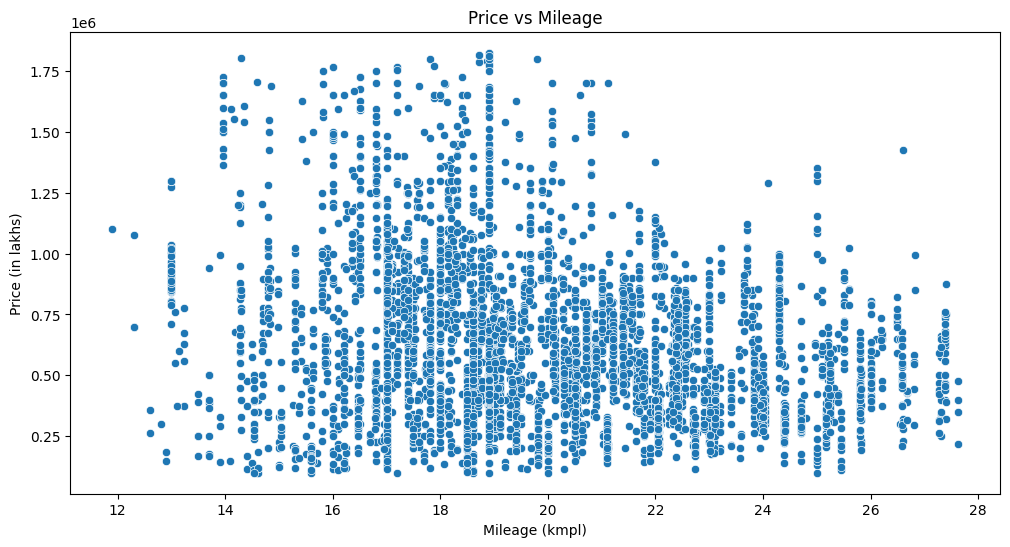

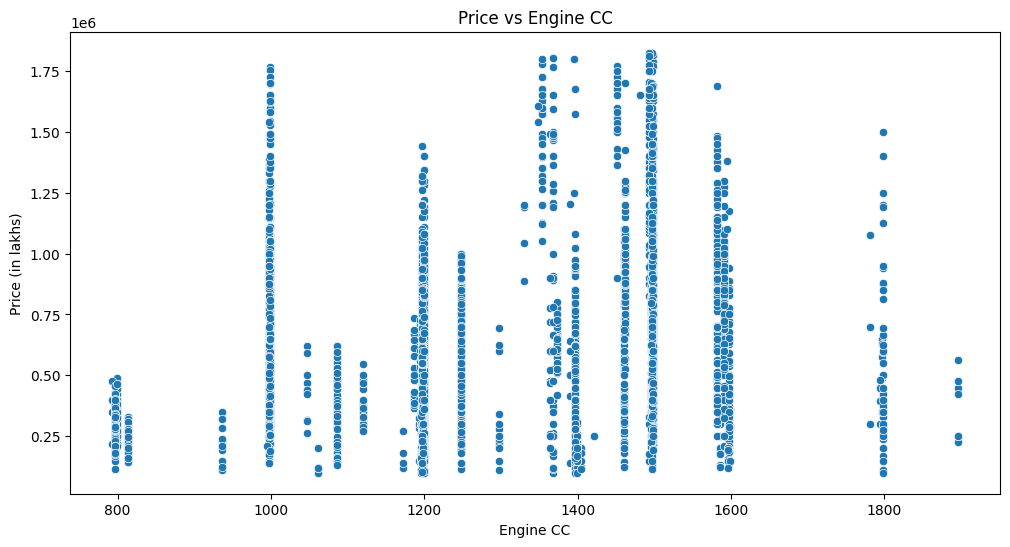

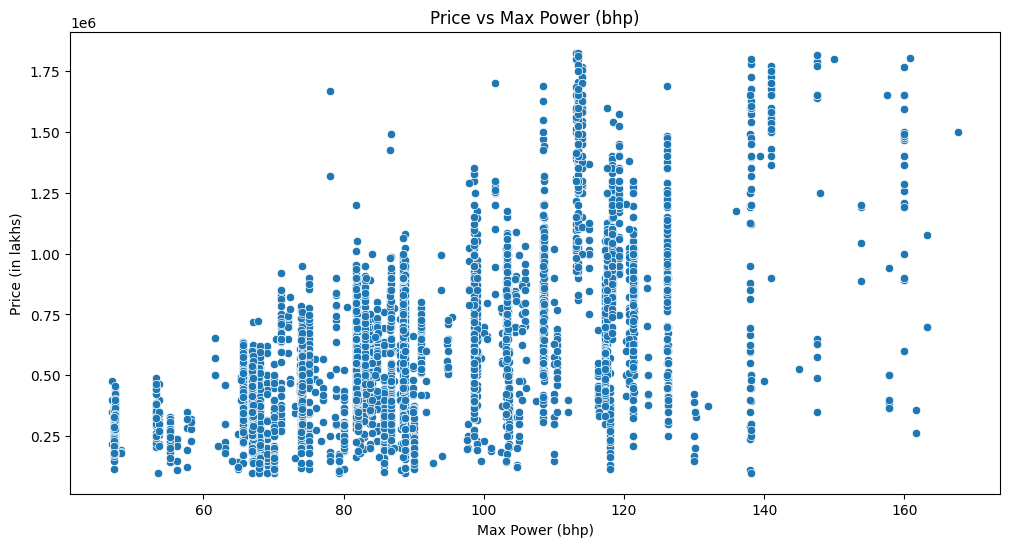

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to see the relation between 'price' and other numerical columns
plt.figure(figsize=(12, 6))
sns.scatterplot(x='specs_mileage_kmpl', y='price', data=df_cleaned)
plt.title('Price vs Mileage')
plt.xlabel('Mileage (kmpl)')
plt.ylabel('Price (in lakhs)')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='specs_engine_cc', y='price', data=df_cleaned)
plt.title('Price vs Engine CC')
plt.xlabel('Engine CC')
plt.ylabel('Price (in lakhs)')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='specs_max_power_bhp', y='price', data=df_cleaned)
plt.title('Price vs Max Power (bhp)')
plt.xlabel('Max Power (bhp)')
plt.ylabel('Price (in lakhs)')
plt.show()

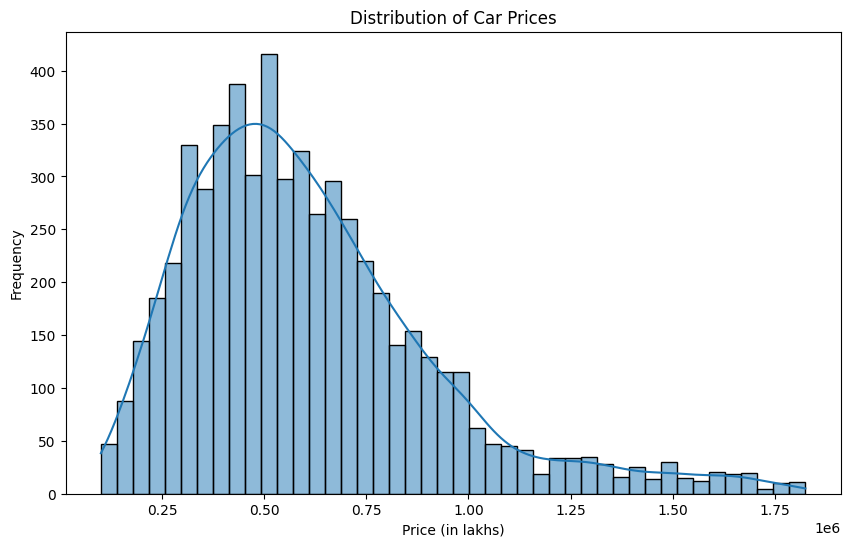

In [62]:
# Plotting histogram for the 'price' column
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (in lakhs)')
plt.ylabel('Frequency')
plt.show()

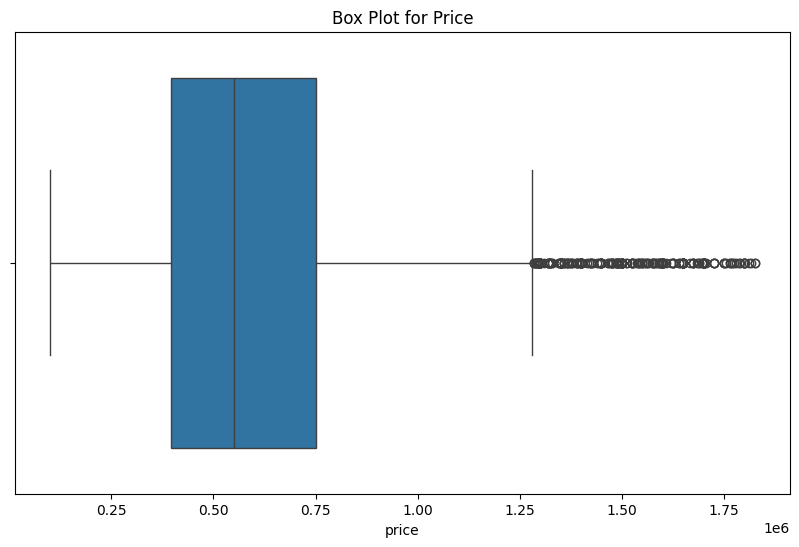

In [63]:
# Box plot for the 'price' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['price'])
plt.title('Box Plot for Price')
plt.show()

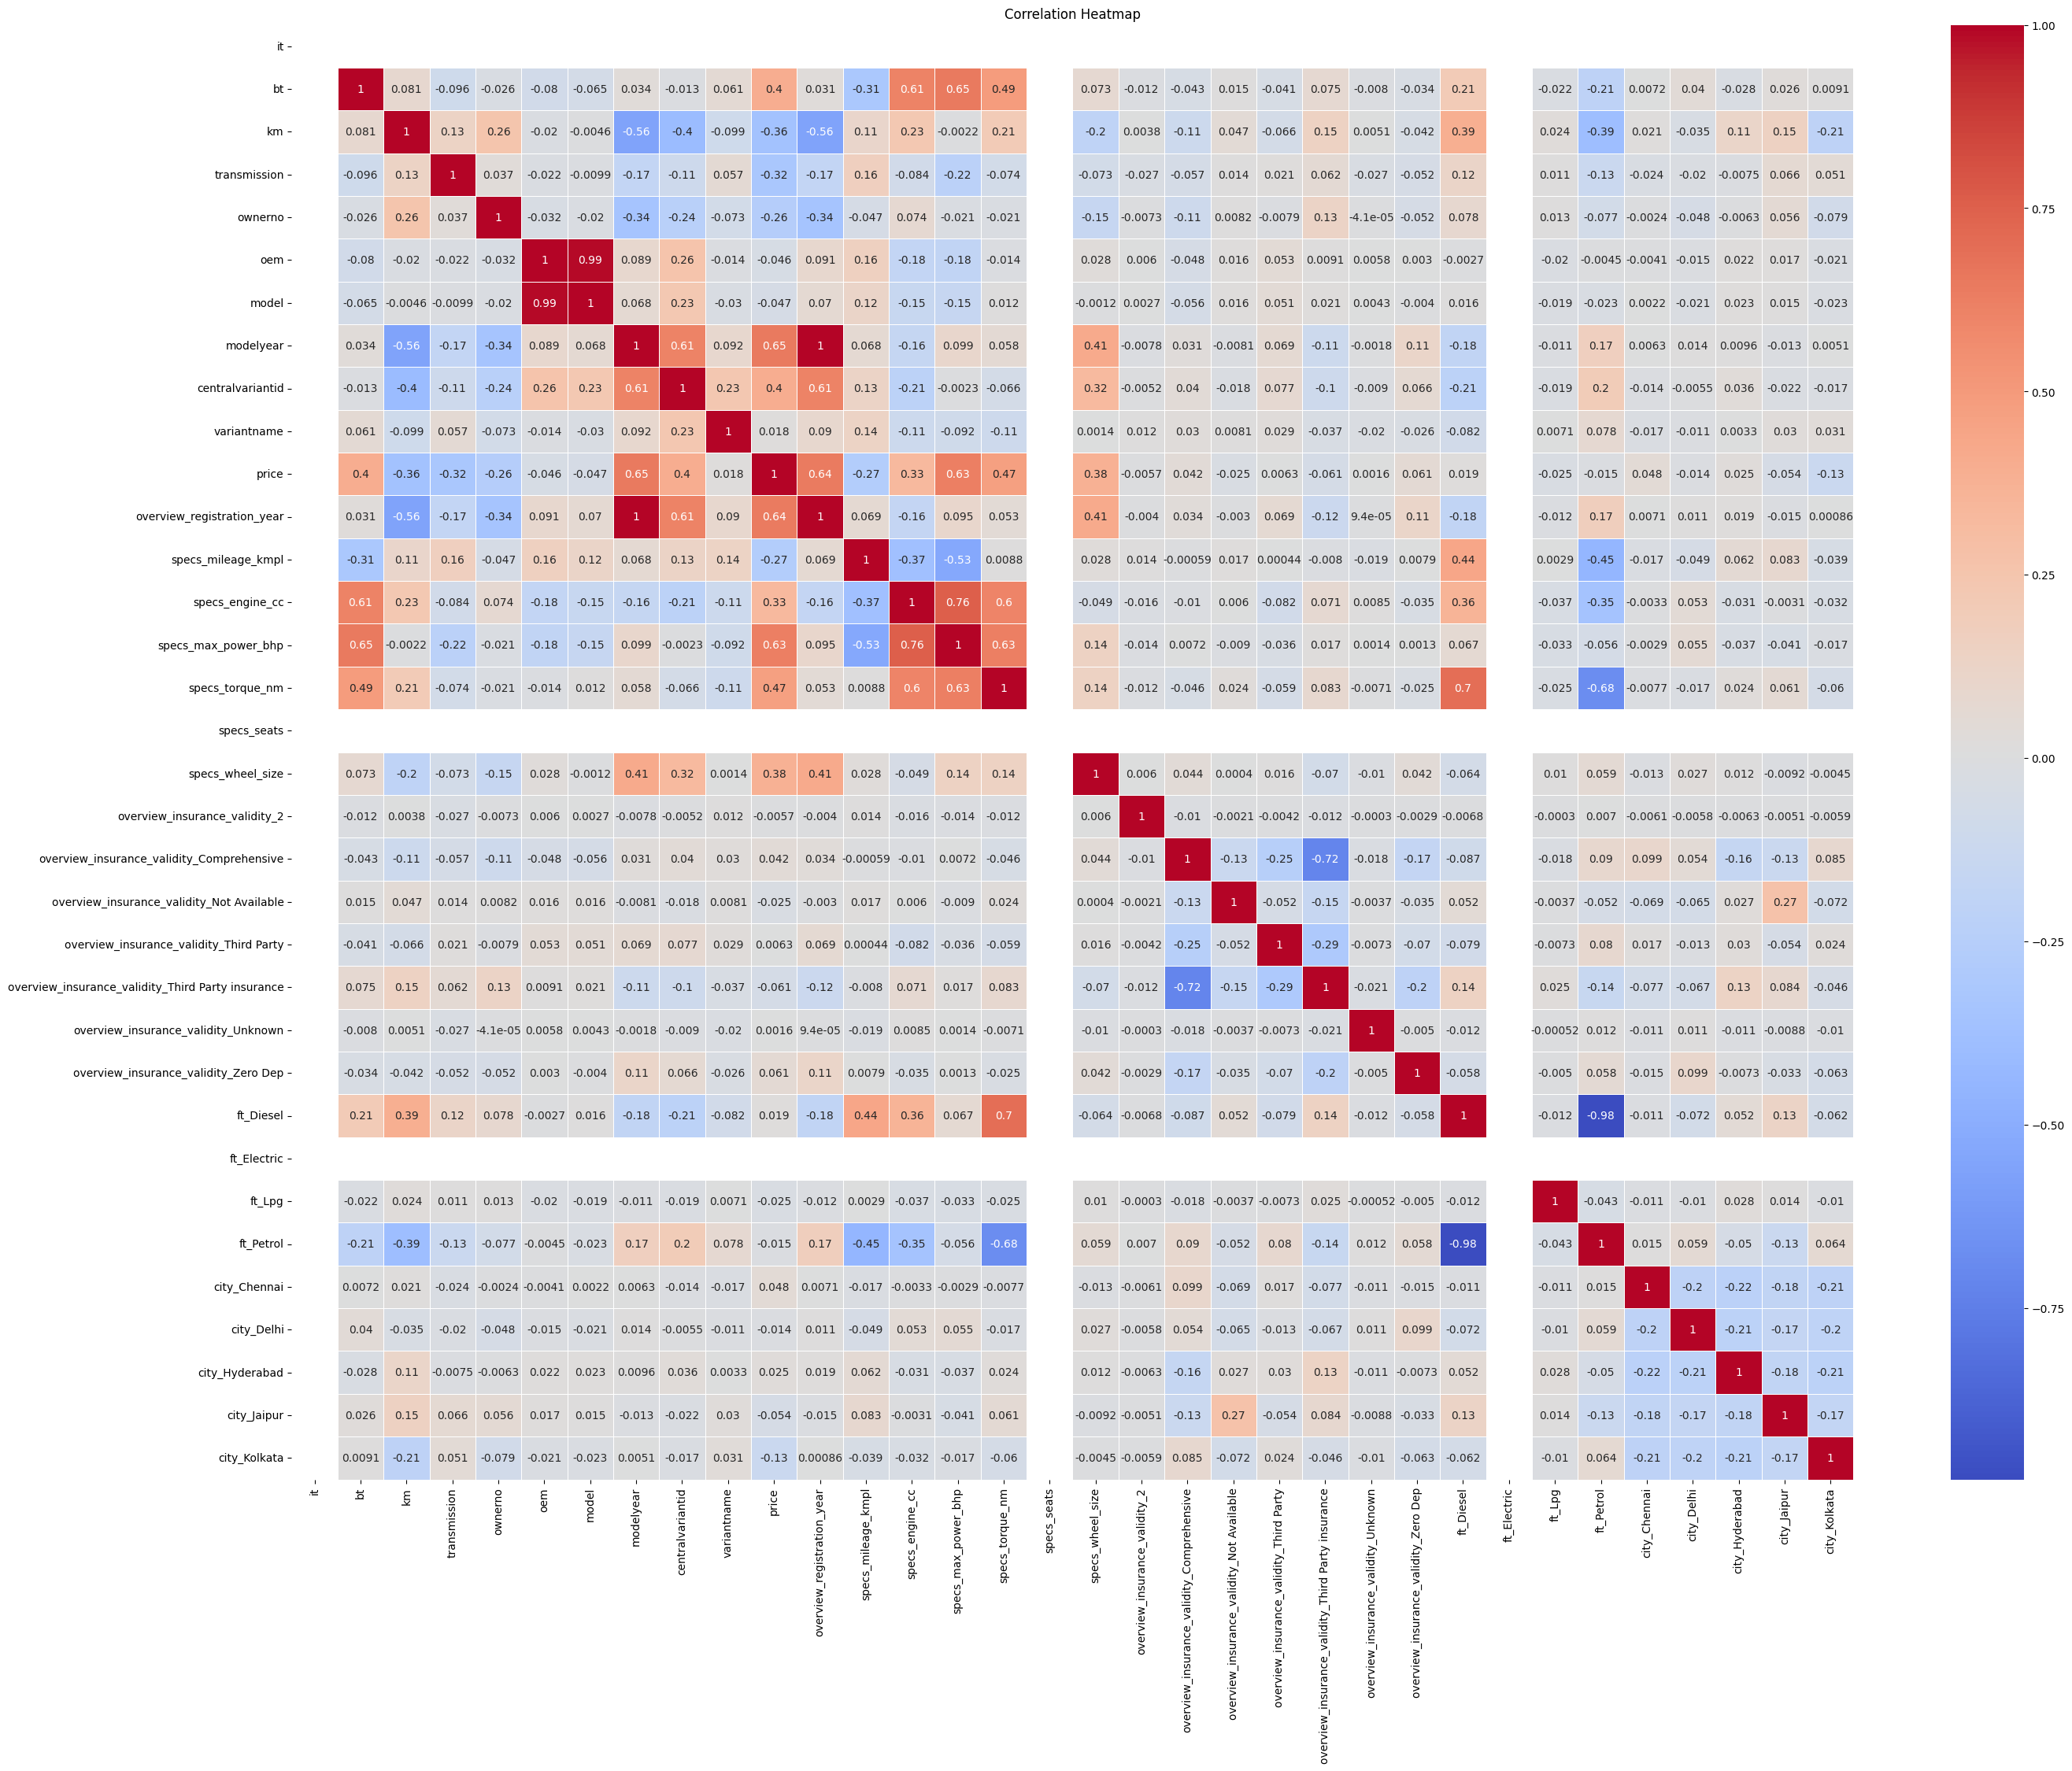

In [64]:
# Correlation Heatmap
plt.figure(figsize=(32, 24))
correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [65]:
from sklearn.ensemble import RandomForestRegressor

# Fit a RandomForest model to assess feature importance
X = df_all_encoded.drop('price', axis=1)
y = df_all_encoded['price']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=["importance"]).sort_values("importance", ascending=False)
print(feature_importances)

                                                     importance
modelyear                                          1.537406e-01
overview_registration_year                         1.243709e-01
km                                                 9.295262e-02
variantname                                        9.155794e-02
specs_wheel_size                                   8.257737e-02
specs_max_power_bhp                                8.063306e-02
centralvariantid                                   5.919600e-02
specs_torque_nm                                    4.721910e-02
specs_engine_cc                                    4.401818e-02
specs_mileage_kmpl                                 3.589440e-02
ownerno                                            3.557898e-02
overview_insurance_validity_Not Available          2.654652e-02
city_Delhi                                         2.302331e-02
model                                              2.201347e-02
city_Jaipur                             

In [66]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

# Step 1: Train-Test Split (80-20 split)
X = df_cleaned.drop('price', axis=1)  # Features
y = df_cleaned['price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize the Linear Regression model
model_lr = LinearRegression()

# Step 3: Train the model
model_lr.fit(X_train, y_train)

# Step 4: Evaluate the model using cross-validation (CV)
cv_scores_lr = cross_val_score(model_lr, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae_lr = np.mean(cv_scores_lr)  # Average of cross-validation MAE scores

# Step 5: Predict on the test set
y_pred_lr = model_lr.predict(X_test)

# Step 6: Evaluate performance metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Step 7: Print the evaluation results
print("Linear Regression Model Evaluation:")
print(f"CV MAE: {cv_mae_lr:.4f}")
print(f"Test MAE: {mae_lr:.4f}")
print(f"Test MSE: {mse_lr:.4f}")
print(f"Test R²: {r2_lr:.4f}")

Linear Regression Model Evaluation:
CV MAE: -100609.9787
Test MAE: 99302.3740
Test MSE: 17626812066.9373
Test R²: 0.7998


In [67]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

# Step 1: Train-Test Split (80-20 split)
X = df_cleaned.drop('price', axis=1)  # Features
y = df_cleaned['price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize the Decision Tree model
model_dt = DecisionTreeRegressor(random_state=42)

# Step 3: Train the model
model_dt.fit(X_train, y_train)

# Step 4: Evaluate the model using cross-validation (CV)
cv_scores_dt = cross_val_score(model_dt, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae_dt = np.mean(cv_scores_dt)  # Average of cross-validation MAE scores

# Step 5: Predict on the test set
y_pred_dt = model_dt.predict(X_test)

# Step 6: Evaluate performance metrics
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Step 7: Print the evaluation results
print("Decision Tree Regressor Model Evaluation:")
print(f"CV MAE: {cv_mae_dt:.4f}")
print(f"Test MAE: {mae_dt:.4f}")
print(f"Test MSE: {mse_dt:.4f}")
print(f"Test R²: {r2_dt:.4f}")

Decision Tree Regressor Model Evaluation:
CV MAE: -85207.7945
Test MAE: 79075.7967
Test MSE: 13560127476.3135
Test R²: 0.8460


In [68]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Step 1: Train-Test Split (80-20 split)
X = df_cleaned.drop('price', axis=1)  # Features
y = df_cleaned['price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize the Random Forest model
model_rf = RandomForestRegressor(random_state=42)

# Step 3: Hyperparameter tuning with GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_rf_model = grid_search_rf.best_estimator_
best_rf_params = grid_search_rf.best_params_

# Step 4: Train the best Random Forest model
best_rf_model.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Step 6: Evaluate performance metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Step 7: Print the evaluation results
print("Random Forest Regressor Model Evaluation:")
print(f"Best Parameters: {best_rf_params}")
print(f"Test MAE: {mae_rf:.4f}")
print(f"Test MSE: {mse_rf:.4f}")
print(f"Test R²: {r2_rf:.4f}")

Random Forest Regressor Model Evaluation:
Best Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}
Test MAE: 58007.2855
Test MSE: 6905097549.4715
Test R²: 0.9216


In [69]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Step 1: Train-Test Split (80-20 split)
X = df_cleaned.drop('price', axis=1)  # Features
y = df_cleaned['price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize the Gradient Boosting model
model_gb = GradientBoostingRegressor(random_state=42)

# Step 3: Hyperparameter tuning with GridSearchCV
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search_gb = GridSearchCV(estimator=model_gb, param_grid=param_grid_gb, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_gb_model = grid_search_gb.best_estimator_
best_gb_params = grid_search_gb.best_params_

# Step 4: Train the best Gradient Boosting model
best_gb_model.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred_gb = best_gb_model.predict(X_test)

# Step 6: Evaluate performance metrics
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Step 7: Print the evaluation results
print("Gradient Boosting Regressor Model Evaluation:")
print(f"Best Parameters: {best_gb_params}")
print(f"Test MAE: {mae_gb:.4f}")
print(f"Test MSE: {mse_gb:.4f}")
print(f"Test R²: {r2_gb:.4f}")

Gradient Boosting Regressor Model Evaluation:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Test MAE: 50499.3261
Test MSE: 5254964625.7252
Test R²: 0.9403


In [70]:
import joblib

# Assuming `gbm_best` is your trained Gradient Boosting model
model_filename = 'car_price_prediction_model.pkl'
joblib.dump(best_gb_model, model_filename)

print(f"Model saved as: {model_filename}")

Model saved as: car_price_prediction_model.pkl


In [71]:
import joblib

# Your trained model
model = best_gb_model

# Specify the full path where you want to save it
save_path = r"C:\Users\91701\OneDrive\Desktop\Streamlit\car_price_prediction_model.pkl"

# Save the model
joblib.dump(model, save_path)

print(f"Model saved at: {save_path}")

Model saved at: C:\Users\91701\OneDrive\Desktop\Streamlit\car_price_prediction_model.pkl
